!pip install pgmpy

## Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, os, matplotlib.pyplot as py_grp,matplotlib as py_mp,seaborn as py_sb
import datetime
!pip install pgmpy
from pgmpy import estimators,models,inference
import networkx as nx

from IPython.display import display, HTML

from sklearn import naive_bayes, tree, svm, neighbors, linear_model, metrics
from sklearn import model_selection, preprocessing, pipeline, utils,decomposition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.4 MB/s eta 0:00:00


In [3]:
t1 = datetime.datetime.now()

## Data Reading

In [4]:
def LoadingData(dt_lst,nmdt,dtlc):
    df_1=pd.read_csv(nmdt[0],names=dt_lst)
    df_2=pd.read_csv(nmdt[1],names=dt_lst)
    df_3=pd.read_csv(nmdt[2],names=dt_lst)
    uchr=pd.concat([df_1,df_2,df_3])
    print("Instances in {} is {}\nInstances in {} is {}\nInstances in {} is {}".format(dtlc[0],len(df_1),dtlc[1],len(df_2),dtlc[2],len(df_3)))
    print("Total Data Inatances: ",len(uchr))
    display(HTML(uchr.head().to_html()))
    return uchr

In [6]:
hrfts=["age","sex","cp","trestbps","chol","fbs",
         "restecg","thalach","exang","oldpeak","slope",
         "ca","thal","target"]
clev='processed.cleveland.data'
hung='processed.hungarian.data'
switz='processed.switzerland.data'
alllocs=['cleveland','hungarian','switzerland']
three_df=[clev, hung, switz]
UCI_Hr=LoadingData(hrfts,three_df, alllocs)

Instances in cleveland is 303
Instances in hungarian is 294
Instances in switzerland is 123
Total Data Inatances:  720


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Information

In [7]:
def Details(uchr):
    print("Feature Details\n")
    print(uchr.info())
    print("Feature Statistics\n")
    display(HTML(uchr.describe().to_html()))
    print("Missing Values\n")
    print(uchr.isna().sum())

In [8]:
Details(UCI_Hr)

Feature Details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    object 
 4   chol      720 non-null    object 
 5   fbs       720 non-null    object 
 6   restecg   720 non-null    object 
 7   thalach   720 non-null    object 
 8   exang     720 non-null    object 
 9   oldpeak   720 non-null    object 
 10  slope     720 non-null    object 
 11  ca        720 non-null    object 
 12  thal      720 non-null    object 
 13  target    720 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 84.4+ KB
None
Feature Statistics



,age,sex,cp,target
count,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,0.850000
std,9.193720,0.439546,0.953646,1.076878
min,28.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,4.000000,0.500000
75%,58.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,4.000000


Missing Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Data Noise (? Character) Removal

In [ ]:
def RemoveQ(uchr):
    uchr_cts=uchr.dtypes[uchr.dtypes=='object'].index.tolist()
    uchr[uchr_cts[0]]
    fet2con=[[] for i in range(len(uchr_cts))]
    for i in range(len(uchr_cts)):
        for j in range(len(uchr[uchr_cts[i]].tolist())):
            if uchr[uchr_cts[i]].tolist()[j]=="?" or uchr[uchr_cts[i]].tolist()[j]=="-9.":
                fet2con[i].append(0)
            else:
                fet2con[i].append(uchr[uchr_cts[i]].tolist()[j])
        uchr[uchr_cts[i]]=np.array(fet2con[i],float)
    print(uchr.info())
    uchr=uchr.reset_index(drop=True)
    display(HTML(uchr.head().to_html()))
    return uchr

In [ ]:
UCI_Hr_Clean=RemoveQ(UCI_Hr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 106.5 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Target Encoding

In [ ]:
UCI_Hr_Clean['target'].value_counts()

0    492
1    165
2    108
3    105
4     39
Name: target, dtype: int64

In [ ]:
def PrepTarget(uchr):
    cpyuchr1=uchr.copy()
    trgft='target'
    #cpyuchr1[trgft]=cpyuchr1[trgft].replace(cpyuchr1[trgft].unique(),[0,1,1,1,1]) #'HD_Severity_1','HD_Severity_2','HD_Severity_3','HD_Severity_4'
    cpyuchr1[trgft]=cpyuchr1[trgft].replace(cpyuchr1[trgft].unique(),['No_Disease','HD_Severity_1','HD_Severity_2','HD_Severity_3','HD_Severity_4'])
    print(cpyuchr1[trgft].value_counts())
    display(HTML(cpyuchr1.head().to_html()))
    print("Informatiuon of Features after Target Transformation\n")
    print(cpyuchr1.info())
    return cpyuchr1

In [ ]:
UCI_Hr_Clean=PrepTarget(UCI_Hr_Clean)

No_Disease       492
HD_Severity_2    165
HD_Severity_1    108
HD_Severity_3    105
HD_Severity_4     39
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,No_Disease
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,HD_Severity_1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,HD_Severity_2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,No_Disease
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,No_Disease


Informatiuon of Features after Target Transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    object 
dtypes: float64(13), object(1)
memory usage: 99.5+ KB
None


In [ ]:
UCI_Hr_Clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,No_Disease
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,HD_Severity_1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,HD_Severity_2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,No_Disease
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,No_Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,HD_Severity_2
905,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,HD_Severity_1
906,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,HD_Severity_3
907,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,HD_Severity_2


## Create Train and Test Set

In [ ]:
allsupports=UCI_Hr_Clean['target'].value_counts().tolist()
print(UCI_Hr_Clean['target'].value_counts())
labels=UCI_Hr_Clean['target'].value_counts().index.tolist()
hrtdata=[]
for lb in labels:
    hrtdata.append(UCI_Hr_Clean[UCI_Hr_Clean['target']==lb])
Balanced_List=[]
for adf in range(len(hrtdata)):
    if adf==0:
        Balanced_List.append(hrtdata[adf])
    else:
        df=utils.resample(hrtdata[adf], replace = True, n_samples = int(len(hrtdata[adf])*(allsupports[0]/len(hrtdata[adf])))*5, random_state = 0)
        df=df.reset_index(drop=True)
        Balanced_List.append(df)
UCI_Hr_Clean_BLN=pd.concat(Balanced_List).reset_index(drop=True)
UCI_Hr_Clean_BLN['target'].value_counts()

No_Disease       492
HD_Severity_2    165
HD_Severity_1    108
HD_Severity_3    105
HD_Severity_4     39
Name: target, dtype: int64


HD_Severity_2    2460
HD_Severity_1    2460
HD_Severity_3    2460
HD_Severity_4    2460
No_Disease        492
Name: target, dtype: int64

In [ ]:
def SplitData(data):
    data=data.sample(frac=1).reset_index(drop=True)
    traindt=data.iloc[:int(len(data)*0.60)]
    validdt=data.iloc[int(len(data)*0.60):int(len(data)*0.80)]
    testdt=data.iloc[int(len(data)*0.80):]
    return traindt, validdt, testdt

In [ ]:
data_all=list(SplitData(UCI_Hr_Clean_BLN))
data_all.append(UCI_Hr_Clean)
print("Class Distribution in Train Data")
print(data_all[0]['target'].value_counts())
print("Class Distribution in Validation Data")
print(data_all[1]['target'].value_counts())
print("Class Distribution in Test Data")
print(data_all[2]['target'].value_counts())

Class Distribution in Train Data
HD_Severity_1    1508
HD_Severity_2    1483
HD_Severity_4    1466
HD_Severity_3    1451
No_Disease        291
Name: target, dtype: int64
Class Distribution in Validation Data
HD_Severity_3    525
HD_Severity_4    520
HD_Severity_1    470
HD_Severity_2    452
No_Disease        99
Name: target, dtype: int64
Class Distribution in Test Data
HD_Severity_2    525
HD_Severity_3    484
HD_Severity_1    482
HD_Severity_4    474
No_Disease       102
Name: target, dtype: int64


## Outlier Detection and Removal

In [ ]:
def UCHrtBoxPlot(hd,spl):
    hd.plot(kind='box',figsize=(9,4))
    py_grp.title("Boxplot for Detection of Outliers({})".format(spl),fontsize=17,color="b")
    py_grp.xlabel("Features",fontsize=15,color="b")
    py_grp.xticks(rotation=90)
    py_grp.ylabel("Value",fontsize=  15,color="b")
    py_grp.grid()
    py_grp.show()

In [ ]:
def RemoveOuts(uchr,dn):
    UCHrtBoxPlot(uchr,"{} Data".format(dn))
    allOtLr=[]
    for cl in uchr.columns.tolist():
        p25q = np.percentile(uchr[cl], 25, interpolation = 'midpoint')
        p75q = np.percentile(uchr[cl], 75, interpolation = 'midpoint')
        RngP25P75 = p75q - p25q
        lval = p25q - 1.5 * RngP25P75
        uval = p75q + 1.5 * RngP25P75
        OtLr =[]
        for h in uchr[cl]:
            if ((h> uval) or (h<lval)):
                 OtLr.append(h)
        print('Count of Outlier in the Feature: {} =>'.format(cl), len(OtLr))
        allOtLr.append(OtLr)
    for o in allOtLr:
        if len(o)>1:
            mdnrm = preprocessing.MinMaxScaler()
            uchr_norm=mdnrm.fit_transform(uchr)
            break
    return uchr_norm

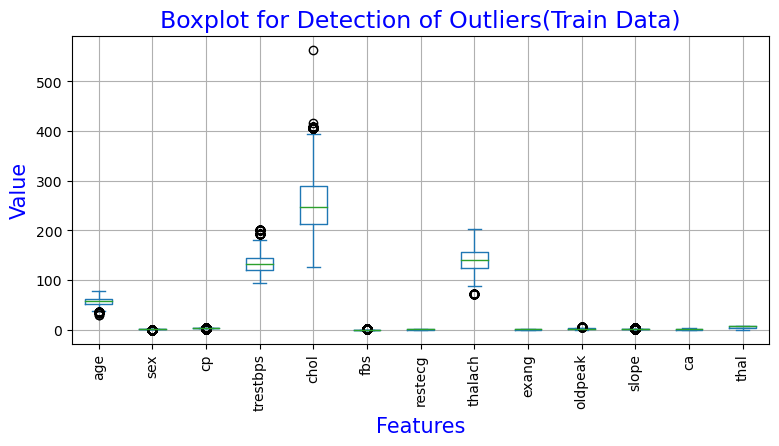

Count of Outlier in the Feature: age => 58
Count of Outlier in the Feature: sex => 1173
Count of Outlier in the Feature: cp => 1424
Count of Outlier in the Feature: trestbps => 83
Count of Outlier in the Feature: chol => 174
Count of Outlier in the Feature: fbs => 964
Count of Outlier in the Feature: restecg => 0
Count of Outlier in the Feature: thalach => 43
Count of Outlier in the Feature: exang => 0
Count of Outlier in the Feature: oldpeak => 68
Count of Outlier in the Feature: slope => 2097
Count of Outlier in the Feature: ca => 0
Count of Outlier in the Feature: thal => 0


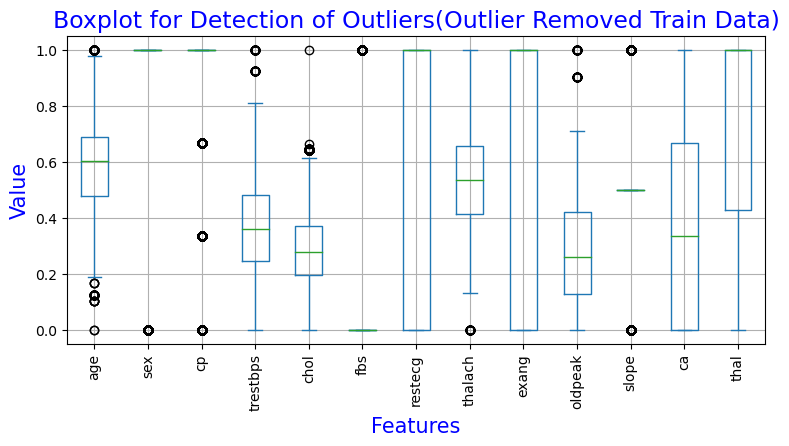

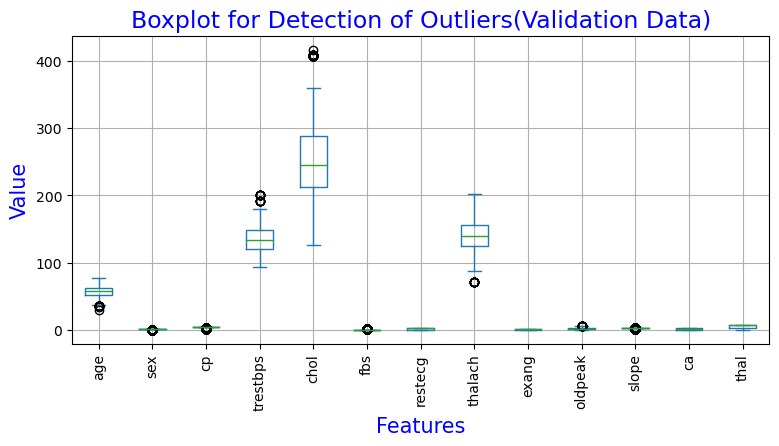

Count of Outlier in the Feature: age => 24
Count of Outlier in the Feature: sex => 387
Count of Outlier in the Feature: cp => 490
Count of Outlier in the Feature: trestbps => 14
Count of Outlier in the Feature: chol => 58
Count of Outlier in the Feature: fbs => 301
Count of Outlier in the Feature: restecg => 0
Count of Outlier in the Feature: thalach => 11
Count of Outlier in the Feature: exang => 0
Count of Outlier in the Feature: oldpeak => 19
Count of Outlier in the Feature: slope => 682
Count of Outlier in the Feature: ca => 0
Count of Outlier in the Feature: thal => 0


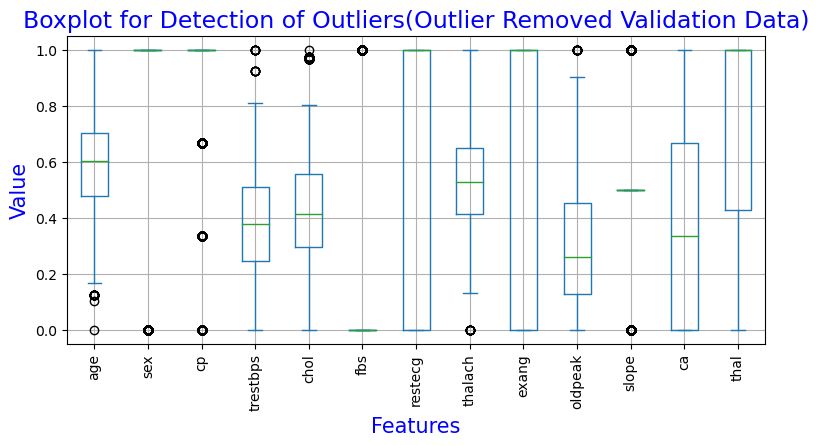

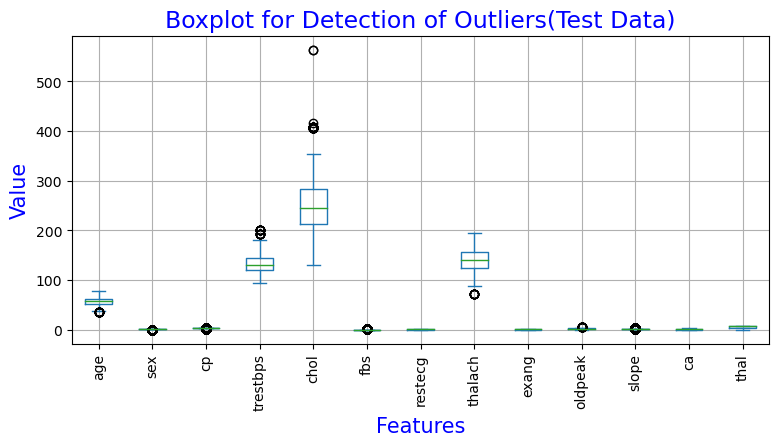

Count of Outlier in the Feature: age => 21
Count of Outlier in the Feature: sex => 378
Count of Outlier in the Feature: cp => 512
Count of Outlier in the Feature: trestbps => 19
Count of Outlier in the Feature: chol => 46
Count of Outlier in the Feature: fbs => 313
Count of Outlier in the Feature: restecg => 0
Count of Outlier in the Feature: thalach => 9
Count of Outlier in the Feature: exang => 0
Count of Outlier in the Feature: oldpeak => 26
Count of Outlier in the Feature: slope => 672
Count of Outlier in the Feature: ca => 0
Count of Outlier in the Feature: thal => 0


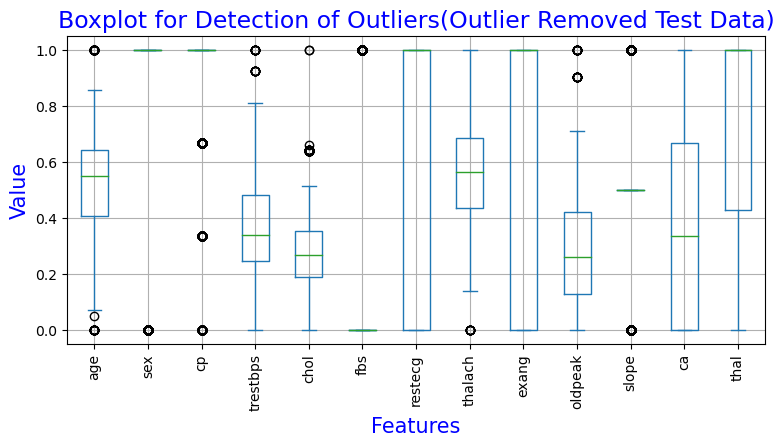

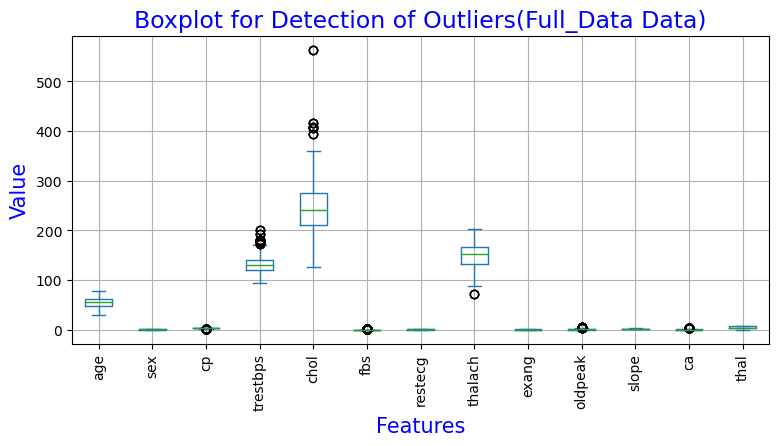

Count of Outlier in the Feature: age => 0
Count of Outlier in the Feature: sex => 0
Count of Outlier in the Feature: cp => 69
Count of Outlier in the Feature: trestbps => 27
Count of Outlier in the Feature: chol => 15
Count of Outlier in the Feature: fbs => 135
Count of Outlier in the Feature: restecg => 0
Count of Outlier in the Feature: thalach => 3
Count of Outlier in the Feature: exang => 0
Count of Outlier in the Feature: oldpeak => 15
Count of Outlier in the Feature: slope => 0
Count of Outlier in the Feature: ca => 60
Count of Outlier in the Feature: thal => 0


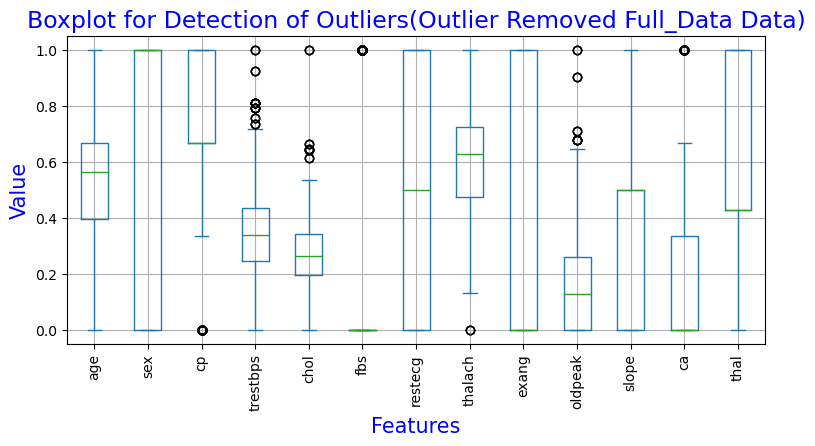

In [ ]:
OutCleanData=[]
dtanm=["Train","Validation","Test","Full_Data"]
idx=0
for da in data_all:
    nrm_da=RemoveOuts(da.drop('target',axis=1),dtanm[idx])
    nrm_dadf=pd.DataFrame(nrm_da,columns=da.drop('target',axis=1).columns.tolist())
    nrm_dadf['target']=da['target'].tolist()
    UCHrtBoxPlot(nrm_dadf.drop('target',axis=1),"Outlier Removed {} Data".format(dtanm[idx]))
    OutCleanData.append(nrm_dadf)
    idx+=1

In [ ]:
OutCleanData[0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.729167,1.0,0.666667,0.433962,0.477169,0.0,0.0,0.664122,0.0,0.000000,0.0,0.000000,0.428571,HD_Severity_2
1,0.625000,1.0,0.000000,0.377358,0.178082,0.0,0.0,0.694656,0.0,0.129032,0.0,0.666667,0.428571,HD_Severity_2
2,0.312500,1.0,1.000000,0.150943,0.162100,0.0,1.0,0.809160,0.0,0.000000,0.0,0.333333,0.428571,HD_Severity_2
3,0.625000,0.0,1.000000,0.754717,0.280822,0.0,0.0,0.549618,1.0,0.000000,0.5,0.000000,0.428571,HD_Severity_2
4,0.416667,1.0,0.666667,0.226415,0.052511,0.0,1.0,0.419847,0.0,0.129032,0.0,1.000000,0.428571,HD_Severity_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194,0.729167,1.0,1.000000,0.481132,0.196347,0.0,1.0,0.465649,0.0,0.322581,0.5,0.666667,0.857143,HD_Severity_4
6195,0.187500,1.0,0.000000,0.245283,0.239726,0.0,0.0,0.847328,1.0,0.612903,0.5,0.000000,1.000000,HD_Severity_4
6196,0.562500,1.0,0.666667,0.339623,0.296804,1.0,1.0,0.541985,1.0,0.096774,0.5,0.333333,0.857143,HD_Severity_1
6197,0.604167,1.0,1.000000,0.188679,0.438356,0.0,0.5,0.526718,0.0,0.709677,1.0,1.000000,0.857143,HD_Severity_4


In [ ]:
OutCleanData[1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.000000,1.0,1.0,0.292453,0.611684,0.0,1.0,0.694656,1.0,0.000000,0.0,1.000000,0.428571,HD_Severity_4
1,0.604167,1.0,1.0,0.188679,0.659794,0.0,0.5,0.526718,0.0,0.709677,1.0,1.000000,0.857143,HD_Severity_4
2,0.750000,0.0,1.0,0.528302,0.340206,0.0,1.0,0.328244,0.0,0.161290,0.5,1.000000,1.000000,HD_Severity_4
3,0.666667,1.0,1.0,0.415094,0.137457,0.0,1.0,0.412214,1.0,0.580645,0.5,0.333333,0.428571,HD_Severity_4
4,0.333333,1.0,1.0,0.452830,0.628866,0.0,1.0,0.580153,1.0,0.000000,0.5,1.000000,1.000000,HD_Severity_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0.208333,1.0,1.0,0.226415,0.319588,0.0,0.0,0.526718,0.0,0.193548,0.5,0.000000,1.000000,HD_Severity_3
2062,0.625000,1.0,1.0,0.716981,0.687285,0.0,1.0,0.526718,1.0,0.548387,1.0,0.000000,1.000000,HD_Severity_1
2063,0.625000,1.0,1.0,0.433962,0.175258,0.0,0.0,0.694656,1.0,0.000000,0.0,0.333333,1.000000,HD_Severity_1
2064,0.791667,1.0,1.0,0.622642,0.549828,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.428571,HD_Severity_1


In [ ]:
OutCleanData[2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.738095,1.0,0.333333,0.622642,0.265589,0.0,0.0,0.395161,1.0,0.000000,0.5,1.000000,0.857143,HD_Severity_1
1,0.071429,1.0,0.000000,0.245283,0.230947,0.0,0.0,0.895161,1.0,0.612903,0.5,0.000000,1.000000,HD_Severity_4
2,0.523810,1.0,1.000000,0.669811,0.364896,1.0,1.0,0.427419,0.0,0.161290,0.5,1.000000,1.000000,HD_Severity_4
3,0.404762,1.0,0.000000,0.226415,0.127021,0.0,1.0,0.959677,0.0,0.000000,0.5,0.000000,0.857143,No_Disease
4,0.738095,1.0,0.333333,0.622642,0.265589,0.0,0.0,0.395161,1.0,0.000000,0.5,1.000000,0.857143,HD_Severity_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,0.809524,1.0,0.666667,0.433962,0.284065,0.0,1.0,0.604839,0.0,0.322581,0.5,1.000000,1.000000,HD_Severity_1
2063,0.357143,1.0,1.000000,0.528302,0.258661,0.0,1.0,0.459677,0.0,0.419355,0.5,0.000000,1.000000,HD_Severity_4
2064,0.380952,1.0,1.000000,0.433962,0.385681,0.0,0.0,0.411290,1.0,0.677419,0.5,1.000000,1.000000,HD_Severity_3
2065,0.761905,1.0,0.666667,0.547170,0.187067,0.0,1.0,0.637097,0.0,0.129032,0.5,0.000000,1.000000,HD_Severity_2


## Bayesian Feature Selection Process

In [ ]:
UCHRnormdf=OutCleanData[3].copy()
UCHRnormdf1=UCHRnormdf.copy()
UCHRnormdf1['target']=UCHRnormdf1['target'].replace(UCHRnormdf1['target'].unique(),[0,1,2,3,4])
Crl_HR=UCHRnormdf1.corr()
ftlist=Crl_HR['target'].tolist()[:-1]
PredFet=Crl_HR['target'].index.tolist()[:-1]
fin_fets,ftcorrel=[],[]
for j in range(len(ftlist)):
    if ftlist[j]>np.array(ftlist).mean():
        fin_fets.append(PredFet[j])
        ftcorrel.append(ftlist[j])
DfFets=pd.DataFrame({"Features":fin_fets,"Correlation":ftcorrel})
display(HTML(DfFets.to_html()))

hr_fets=[]
for ft in fin_fets:
    hr_fets.append(tuple([ft,"target"]))
print("Feature and Target Combination for Graph:\n",*hr_fets,sep="\n")

Bayesian= models.BayesianModel(hr_fets)
Bayesian.fit(UCHRnormdf,estimator=estimators.MaximumLikelihoodEstimator)
IF_Bys = inference.VariableElimination(Bayesian)

Fet_Qry=[]
for ff in range(len(fin_fets)):
    print('\n {}. Heart Disease Probability for: {}'.format(ff+1,fin_fets[ff]))
    BysEvidence=IF_Bys.query(variables=['target'],evidence={'{}'.format(fin_fets[ff]):1})
    Fet_Qry.append(BysEvidence)
    print(BysEvidence)

,Features,Correlation
0,sex,0.242698
1,cp,0.368103
2,exang,0.370535
3,oldpeak,0.428425
4,slope,0.333847
5,ca,0.462930
6,thal,0.479050


Feature and Target Combination for Graph:

('sex', 'target')
('cp', 'target')
('exang', 'target')
('oldpeak', 'target')
('slope', 'target')
('ca', 'target')
('thal', 'target')

 1. Heart Disease Probability for: sex
+-----------------------+---------------+
| target                |   phi(target) |
+=======================+===============+
| target(HD_Severity_1) |        0.1842 |
+-----------------------+---------------+
| target(HD_Severity_2) |        0.2041 |
+-----------------------+---------------+
| target(HD_Severity_3) |        0.1823 |
+-----------------------+---------------+
| target(HD_Severity_4) |        0.1745 |
+-----------------------+---------------+
| target(No_Disease)    |        0.2549 |
+-----------------------+---------------+

 2. Heart Disease Probability for: cp
+-----------------------+---------------+
| target                |   phi(target) |
+=======================+===============+
| target(HD_Severity_1) |        0.1853 |
+-----------------------+------

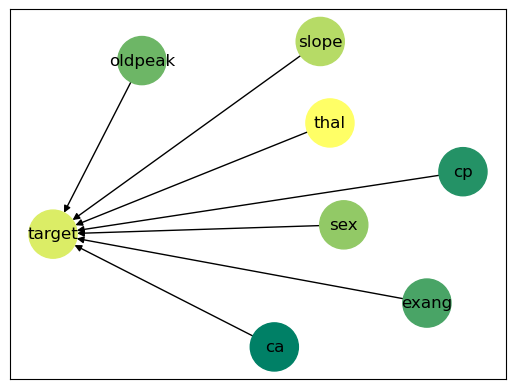

In [ ]:
nx_graph = nx.DiGraph(Bayesian.edges())
color_lookup = {k:v for v, k in enumerate(sorted(set(nx_graph.nodes())))}
low, *_, high = sorted(color_lookup.values())
norm = py_mp.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = py_mp.cm.ScalarMappable(norm=norm, cmap=py_mp.cm.summer)
nx.draw_networkx(nx_graph,
        nodelist=color_lookup,
        node_size=1200,
        node_color=[mapper.to_rgba(i)
                    for i in color_lookup.values()],
        with_labels=True)
py_grp.show()

In [ ]:
NDPrb,HrPrb1,HrPrb2,HrPrb3,HrPrb4=[],[],[],[],[]
for x in range(len(Fet_Qry)):
    NDPrb.append(float(str(Fet_Qry[x])[159:165]))
    HrPrb1.append(float(str(Fet_Qry[x])[243:250]))
    HrPrb2.append(float(str(Fet_Qry[x])[327:333]))
    HrPrb3.append(float(str(Fet_Qry[x])[411:417]))
    HrPrb4.append(float(str(Fet_Qry[x])[495:501]))
FetUCHRDF=pd.DataFrame({
    "Features":fin_fets,
    "Healthy(Probability)":NDPrb,
    "HD_1(Probability)":HrPrb1,
    "HD_2(Probability)":HrPrb2,
    "HD_3(Probability)":HrPrb3,
    "HD_4(Probability)":HrPrb4,

})
#prbdiff=FetUCHRDF['Heart Disease(Probability)']-FetUCHRDF['Healthy(Probability)'].tolist()
#FetUCHRDF['Difference']=prbdiff
#FetUCHRDF=FetUCHRDF[FetUCHRDF['Difference']>-0.0002]
FetUCHRDF

,Features,Healthy(Probability),HD_1(Probability),HD_2(Probability),HD_3(Probability),HD_4(Probability)
0,sex,0.1842,0.2041,0.1823,0.1745,0.2549
1,cp,0.1853,0.2072,0.1812,0.1707,0.2556
2,exang,0.1857,0.2007,0.1947,0.1827,0.2362
3,oldpeak,0.2000,0.2000,0.2001,0.2000,0.2000
4,slope,0.1981,0.1978,0.1973,0.1974,0.2095
5,ca,0.1945,0.1952,0.2002,0.2046,0.2055
6,thal,0.1942,0.2174,0.1929,0.1824,0.2131


In [ ]:
FTfets=FetUCHRDF.Features.tolist()
rejectidx=[]
for fu in range(len(FetUCHRDF)):
    if FetUCHRDF.iloc[fu,1:].mean()<(100/(len(FetUCHRDF.columns)-1))/100:   # filter
        rejectidx.append(fu)
print(rejectidx)
FetUCHRDF.drop(rejectidx, axis=0, inplace=True)
FetUCHRDF=FetUCHRDF.reset_index(drop=True)
FetUCHRDF

[2]


,Features,Healthy(Probability),HD_1(Probability),HD_2(Probability),HD_3(Probability),HD_4(Probability)
0,sex,0.1842,0.2041,0.1823,0.1745,0.2549
1,cp,0.1853,0.2072,0.1812,0.1707,0.2556
2,oldpeak,0.2000,0.2000,0.2001,0.2000,0.2000
3,slope,0.1981,0.1978,0.1973,0.1974,0.2095
4,ca,0.1945,0.1952,0.2002,0.2046,0.2055
5,thal,0.1942,0.2174,0.1929,0.1824,0.2131


## Heart Disease Prediction

In [ ]:
XTrain_UCH=OutCleanData[0][FetUCHRDF.Features.tolist()]
XValid_UCH=OutCleanData[1][FetUCHRDF.Features.tolist()]
XTest_UCH=OutCleanData[2][FetUCHRDF.Features.tolist()]
yTrain_UCH=OutCleanData[0]['target']
yValid_UCH=OutCleanData[1]['target']
yTest_UCH=OutCleanData[2]['target']
print("Train Class Support:\n",yTrain_UCH.value_counts())
print("Train Class Support:\n",yValid_UCH.value_counts())
print("Train Class Support:\n",yTest_UCH.value_counts())

Train Class Support:
 HD_Severity_1    1508
HD_Severity_2    1483
HD_Severity_4    1466
HD_Severity_3    1451
No_Disease        291
Name: target, dtype: int64
Train Class Support:
 HD_Severity_3    525
HD_Severity_4    520
HD_Severity_1    470
HD_Severity_2    452
No_Disease        99
Name: target, dtype: int64
Train Class Support:
 HD_Severity_2    525
HD_Severity_3    484
HD_Severity_1    482
HD_Severity_4    474
No_Disease       102
Name: target, dtype: int64


_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


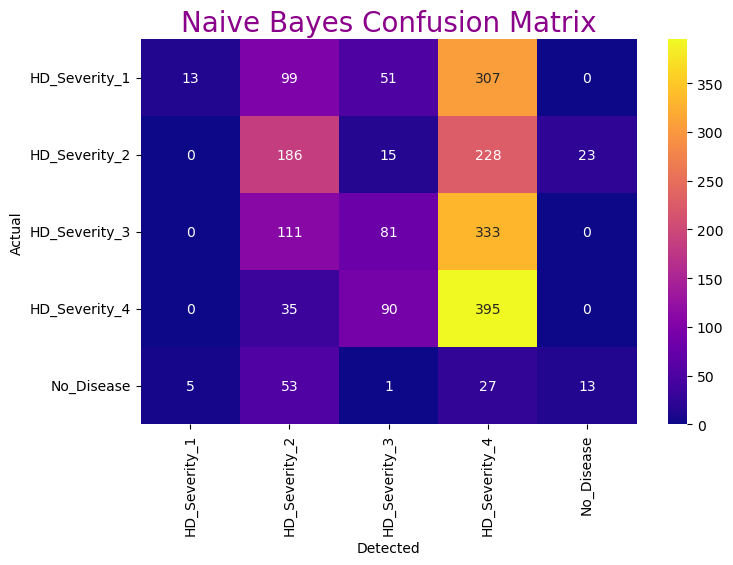


Validation Accuracy: 33.3%


Train Accuracy: 34.15%


Classification Report for Naive Bayes 

               precision    recall  f1-score   support

HD_Severity_1       0.72      0.03      0.05       470
HD_Severity_2       0.38      0.41      0.40       452
HD_Severity_3       0.34      0.15      0.21       525
HD_Severity_4       0.31      0.76      0.44       520
   No_Disease       0.36      0.13      0.19        99

     accuracy                           0.33      2066
    macro avg       0.42      0.30      0.26      2066
 weighted avg       0.43      0.33      0.27      2066

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


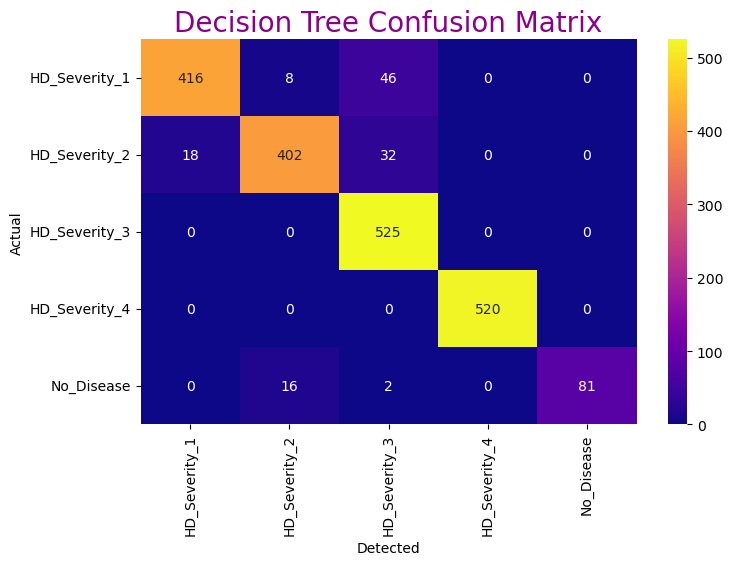


Validation Accuracy: 94.09%


Train Accuracy: 94.37%


Classification Report for Decision Tree 

               precision    recall  f1-score   support

HD_Severity_1       0.96      0.89      0.92       470
HD_Severity_2       0.94      0.89      0.92       452
HD_Severity_3       0.87      1.00      0.93       525
HD_Severity_4       1.00      1.00      1.00       520
   No_Disease       1.00      0.82      0.90        99

     accuracy                           0.94      2066
    macro avg       0.95      0.92      0.93      2066
 weighted avg       0.94      0.94      0.94      2066

_____________________________________________________________________________
                            SVC 
_____________________________________________________________________________


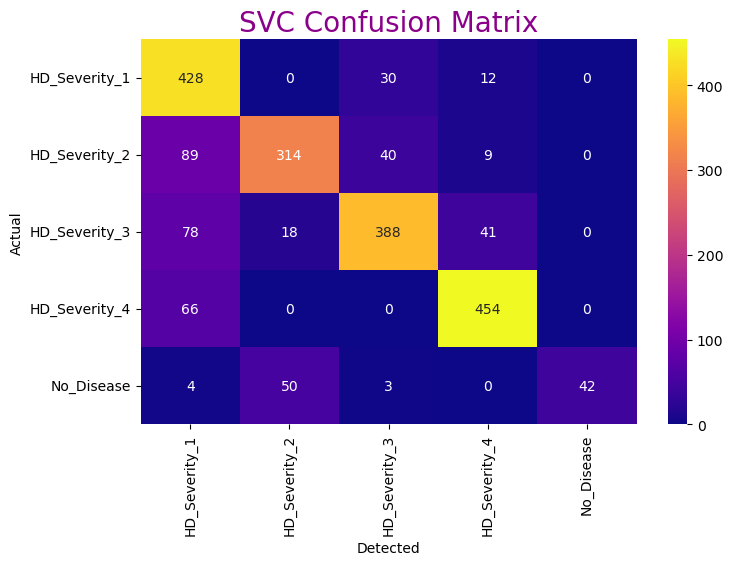


Validation Accuracy: 78.7%


Train Accuracy: 78.59%


Classification Report for SVC 

               precision    recall  f1-score   support

HD_Severity_1       0.64      0.91      0.75       470
HD_Severity_2       0.82      0.69      0.75       452
HD_Severity_3       0.84      0.74      0.79       525
HD_Severity_4       0.88      0.87      0.88       520
   No_Disease       1.00      0.42      0.60        99

     accuracy                           0.79      2066
    macro avg       0.84      0.73      0.75      2066
 weighted avg       0.81      0.79      0.79      2066

_____________________________________________________________________________
                            K-Neighbors 
_____________________________________________________________________________


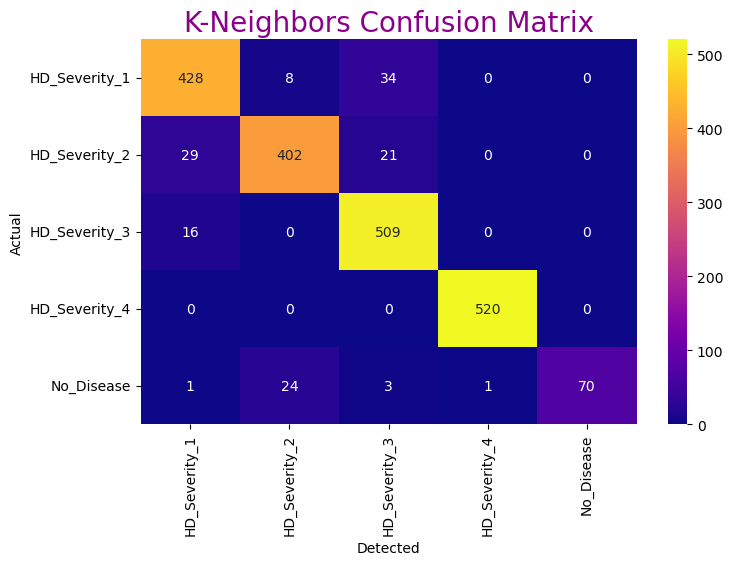


Validation Accuracy: 93.37%


Train Accuracy: 93.69%


Classification Report for K-Neighbors 

               precision    recall  f1-score   support

HD_Severity_1       0.90      0.91      0.91       470
HD_Severity_2       0.93      0.89      0.91       452
HD_Severity_3       0.90      0.97      0.93       525
HD_Severity_4       1.00      1.00      1.00       520
   No_Disease       1.00      0.71      0.83        99

     accuracy                           0.93      2066
    macro avg       0.95      0.90      0.91      2066
 weighted avg       0.94      0.93      0.93      2066

_____________________________________________________________________________
                            Logistic 
_____________________________________________________________________________


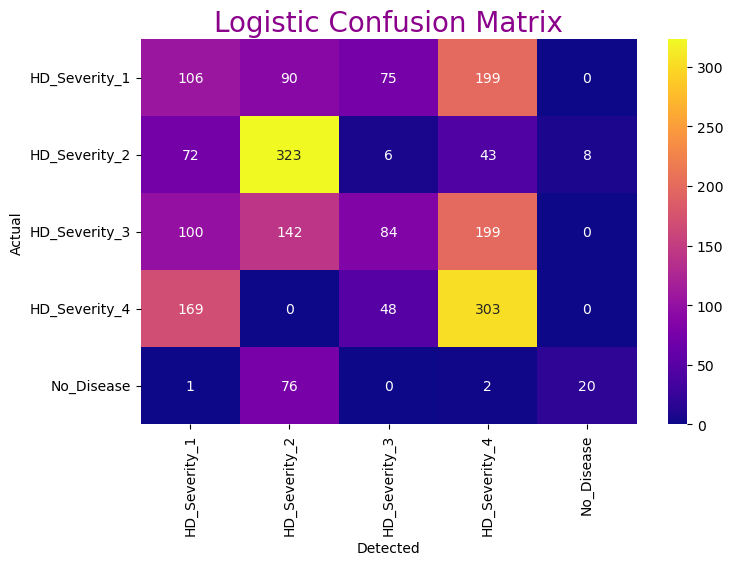


Validation Accuracy: 40.46%


Train Accuracy: 41.62%


Classification Report for Logistic 

               precision    recall  f1-score   support

HD_Severity_1       0.24      0.23      0.23       470
HD_Severity_2       0.51      0.71      0.60       452
HD_Severity_3       0.39      0.16      0.23       525
HD_Severity_4       0.41      0.58      0.48       520
   No_Disease       0.71      0.20      0.31        99

     accuracy                           0.40      2066
    macro avg       0.45      0.38      0.37      2066
 weighted avg       0.40      0.40      0.38      2066

_____________________________________________________________________________


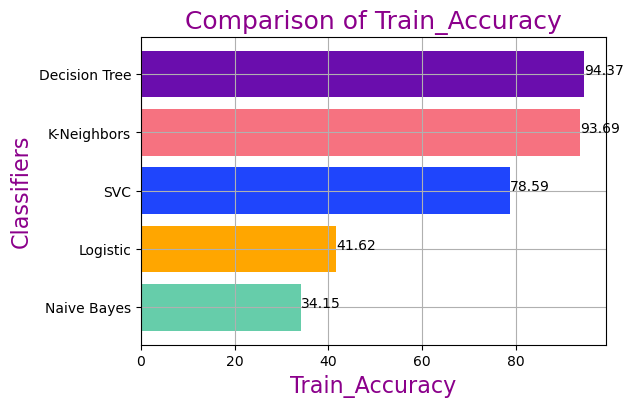

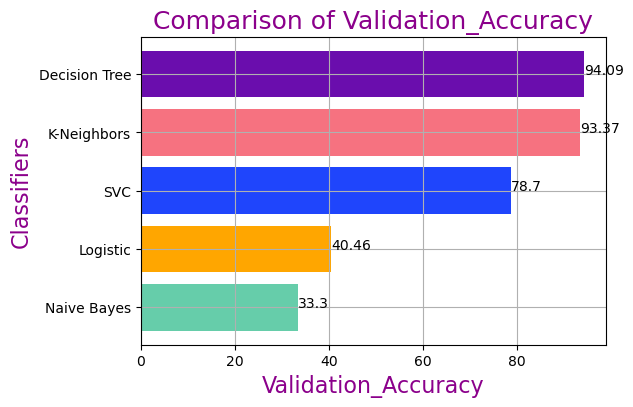

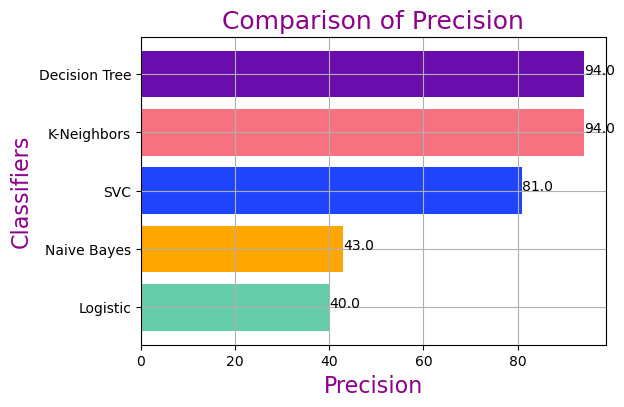

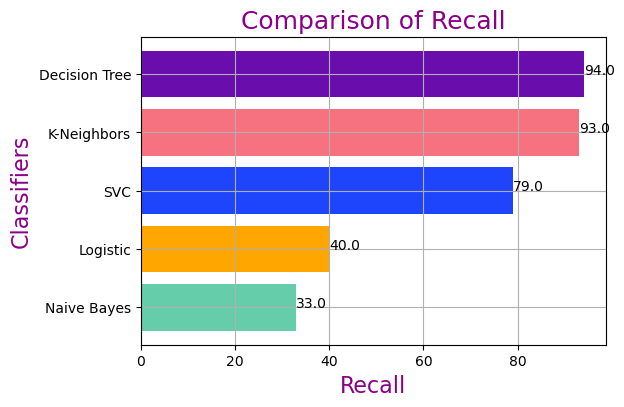

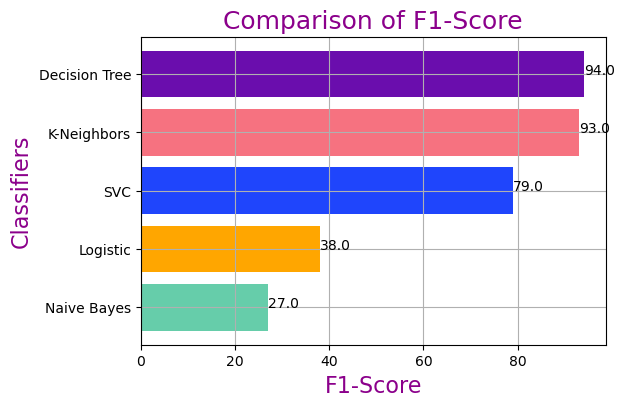

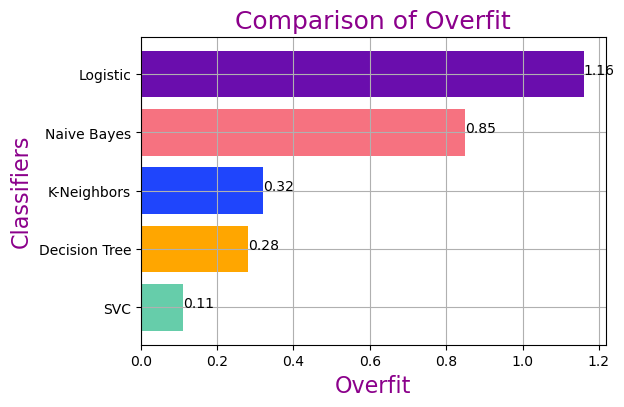

,Classifiers,Train_Accuracy,Validation_Accuracy,Precision,Recall,F1-Score,Overfit
2,SVC,78.59,78.70,81.0,79.0,79.0,0.11
1,Decision Tree,94.37,94.09,94.0,94.0,94.0,0.28
3,K-Neighbors,93.69,93.37,94.0,93.0,93.0,0.32
0,Naive Bayes,34.15,33.30,43.0,33.0,27.0,0.85
4,Logistic,41.62,40.46,40.0,40.0,38.0,1.16


In [ ]:
UCH_Mdls=[
    naive_bayes.BernoulliNB(),
    tree.DecisionTreeClassifier(),
    pipeline.make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='rbf')),
    neighbors.KNeighborsClassifier(),
    linear_model.LogisticRegression()
]
ID_Mdls=[
    "Naive Bayes",
    "Decision Tree",
    "SVC",
    "K-Neighbors",
    "Logistic"
]


UCH_mtList=[[],[],[],[],[],[]]
MdlStored=[]
print("_____________________________________________________________________________")
for i in range(len(UCH_Mdls)):
    print("                            {} ".format(ID_Mdls[i]))
    print("_____________________________________________________________________________")
    LoopMet=[[],[],[],[],[],[]]
    for ts in range(10):
        UCH_Mdls[i].fit(XTrain_UCH,yTrain_UCH)
        TestPrediction=UCH_Mdls[i].predict(XValid_UCH)
        TrainPrediction=UCH_Mdls[i].predict(XTrain_UCH)
        LoopMet[0].append(round(metrics.accuracy_score(yValid_UCH,TestPrediction)*100,2))

        Pred_Metrics=metrics.precision_recall_fscore_support(yValid_UCH,TestPrediction, average='weighted')[:-1]
        LoopMet[1].append(round(Pred_Metrics[0],2)*100)
        LoopMet[2].append(round(Pred_Metrics[1],2)*100)
        LoopMet[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pd.crosstab(yValid_UCH, TestPrediction, rownames=['Actual'], colnames=['Detected'], margins=True)
        LoopMet[4].append(cmt.iloc[:5,:5])
        LoopMet[5].append(metrics.classification_report(yValid_UCH, TestPrediction))
    MdlStored.append(LoopMet[0])
    ixnum=LoopMet[0].index(max(LoopMet[0]))
    UCH_mtList[0].append(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2))
    UCH_mtList[1].append(LoopMet[0][ixnum])
    UCH_mtList[2].append(LoopMet[1][ixnum])
    UCH_mtList[3].append(LoopMet[2][ixnum])
    UCH_mtList[4].append(LoopMet[3][ixnum])
    MdlOv=round(abs(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2)-LoopMet[0][ixnum]),2)
    UCH_mtList[5].append(MdlOv)
    py_grp.figure(figsize=(8,5))
    py_grp.title("{} Confusion Matrix".format(ID_Mdls[i]), fontsize=20,color="#8B008B")
    py_sb.heatmap(LoopMet[4][ixnum],fmt="d",annot=True,cmap="plasma")
    py_grp.show()
    print("\nValidation Accuracy: {}%\n".format(LoopMet[0][ixnum]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(ID_Mdls[i],LoopMet[5][ixnum]))
    print("_____________________________________________________________________________")

ResultHrDF=pd.DataFrame({
    "Classifiers":ID_Mdls,
    "Train_Accuracy":UCH_mtList[0],
    "Validation_Accuracy":UCH_mtList[1],
    "Precision":UCH_mtList[2],
    "Recall":UCH_mtList[3],
    "F1-Score":UCH_mtList[4],
    "Overfit":UCH_mtList[5]
})
DisCrtCol=["#66CDAA","#FFA600","#1F45FC","#F67280","#6A0DAD"]
for rh in ResultHrDF.columns.tolist()[1:]:
    ResultHrDF=ResultHrDF.sort_values(by=rh,ascending=True)
    py_grp.figure(figsize=(6,4))
    py_grp.title("Comparison of {}".format(rh),fontsize=18,color="#8B008B")
    py_grp.barh(ResultHrDF['Classifiers'],ResultHrDF[rh],color=DisCrtCol)
    py_grp.ylabel("Classifiers",fontsize=16,color="#8B008B")
    py_grp.xlabel("{}".format(rh),fontsize=16,color="#8B008B")
    for sl, vl in enumerate(ResultHrDF["{}".format(rh)]):
        py_grp.text(vl, sl, str(vl))
    py_grp.grid()
    py_grp.show()
ResultHrDF.sort_values(by=["Overfit","Validation_Accuracy"],kind='quicksort',
                         ascending = [True, True],ignore_index=True)
ResultHrDF.to_csv("Heart_Clf_DF.csv")
ResultHrDF

_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


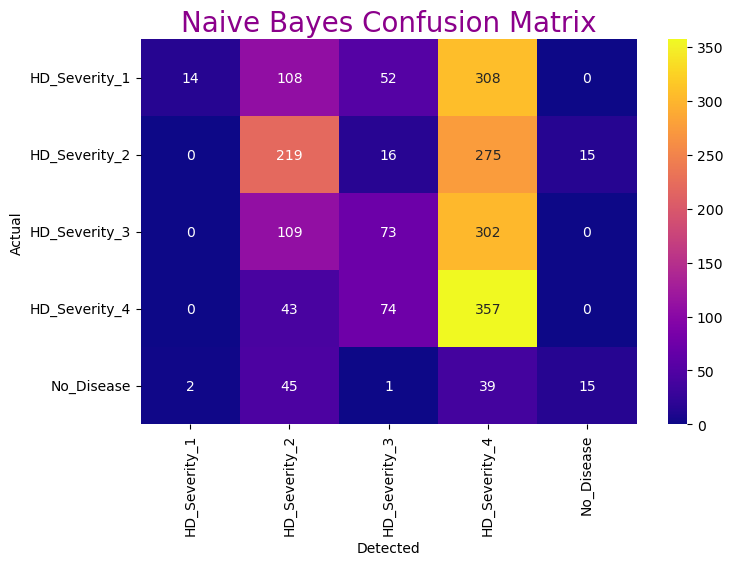


Test Accuracy: 32.8%


Train Accuracy: 34.15%


Classification Report for Naive Bayes 

               precision    recall  f1-score   support

HD_Severity_1       0.88      0.03      0.06       482
HD_Severity_2       0.42      0.42      0.42       525
HD_Severity_3       0.34      0.15      0.21       484
HD_Severity_4       0.28      0.75      0.41       474
   No_Disease       0.50      0.15      0.23       102

     accuracy                           0.33      2067
    macro avg       0.48      0.30      0.26      2067
 weighted avg       0.48      0.33      0.27      2067

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


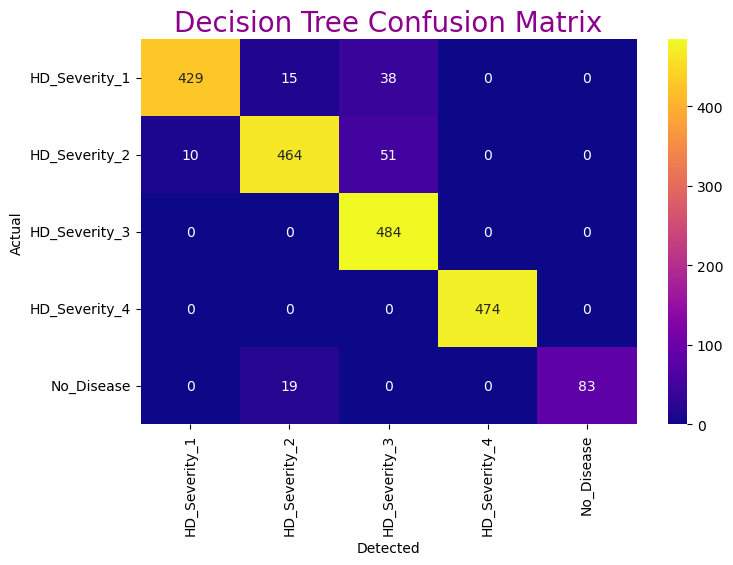


Test Accuracy: 93.57%


Train Accuracy: 94.37%


Classification Report for Decision Tree 

               precision    recall  f1-score   support

HD_Severity_1       0.98      0.89      0.93       482
HD_Severity_2       0.93      0.88      0.91       525
HD_Severity_3       0.84      1.00      0.92       484
HD_Severity_4       1.00      1.00      1.00       474
   No_Disease       1.00      0.81      0.90       102

     accuracy                           0.94      2067
    macro avg       0.95      0.92      0.93      2067
 weighted avg       0.94      0.94      0.94      2067

_____________________________________________________________________________
                            SVC 
_____________________________________________________________________________


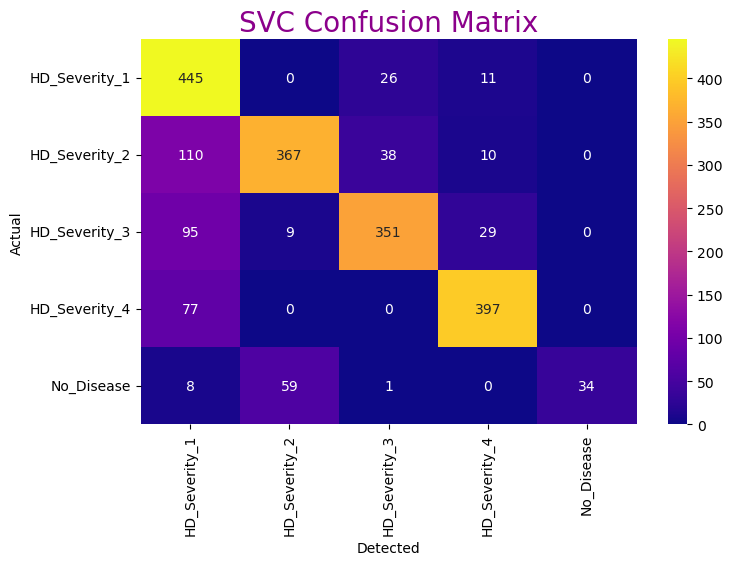


Test Accuracy: 77.12%


Train Accuracy: 78.59%


Classification Report for SVC 

               precision    recall  f1-score   support

HD_Severity_1       0.61      0.92      0.73       482
HD_Severity_2       0.84      0.70      0.76       525
HD_Severity_3       0.84      0.73      0.78       484
HD_Severity_4       0.89      0.84      0.86       474
   No_Disease       1.00      0.33      0.50       102

     accuracy                           0.77      2067
    macro avg       0.84      0.70      0.73      2067
 weighted avg       0.81      0.77      0.77      2067

_____________________________________________________________________________
                            K-Neighbors 
_____________________________________________________________________________


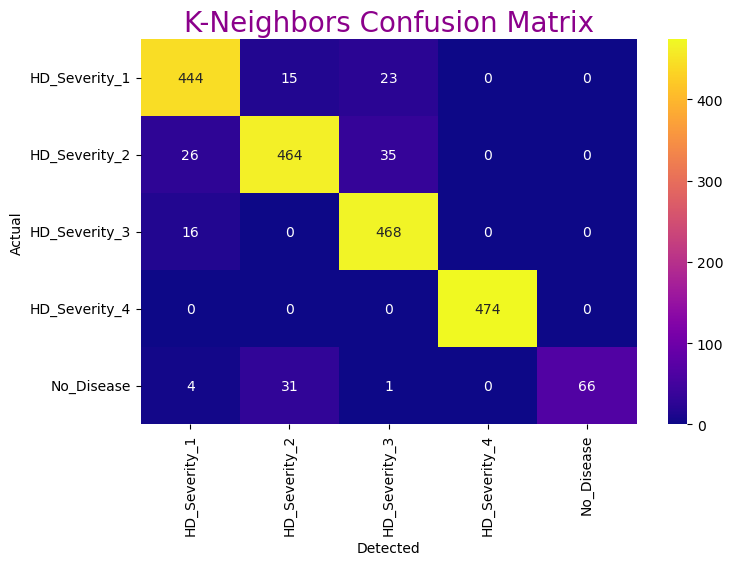


Test Accuracy: 92.69%


Train Accuracy: 93.69%


Classification Report for K-Neighbors 

               precision    recall  f1-score   support

HD_Severity_1       0.91      0.92      0.91       482
HD_Severity_2       0.91      0.88      0.90       525
HD_Severity_3       0.89      0.97      0.93       484
HD_Severity_4       1.00      1.00      1.00       474
   No_Disease       1.00      0.65      0.79       102

     accuracy                           0.93      2067
    macro avg       0.94      0.88      0.90      2067
 weighted avg       0.93      0.93      0.93      2067

_____________________________________________________________________________
                            Logistic 
_____________________________________________________________________________


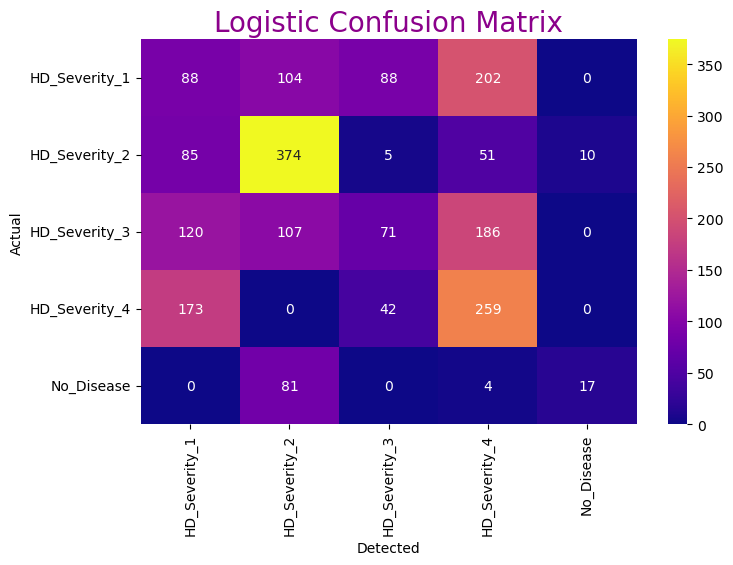


Test Accuracy: 39.14%


Train Accuracy: 41.62%


Classification Report for Logistic 

               precision    recall  f1-score   support

HD_Severity_1       0.19      0.18      0.19       482
HD_Severity_2       0.56      0.71      0.63       525
HD_Severity_3       0.34      0.15      0.21       484
HD_Severity_4       0.37      0.55      0.44       474
   No_Disease       0.63      0.17      0.26       102

     accuracy                           0.39      2067
    macro avg       0.42      0.35      0.34      2067
 weighted avg       0.38      0.39      0.37      2067

_____________________________________________________________________________


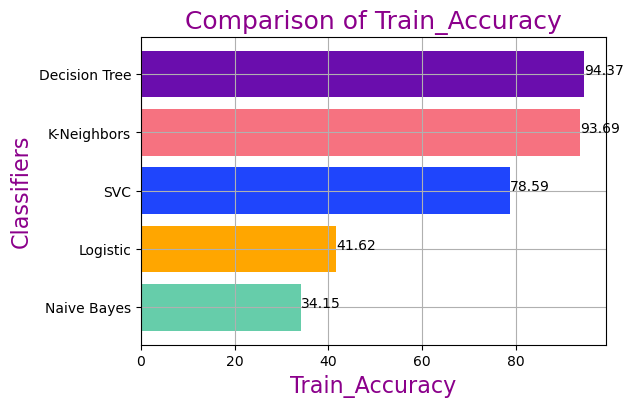

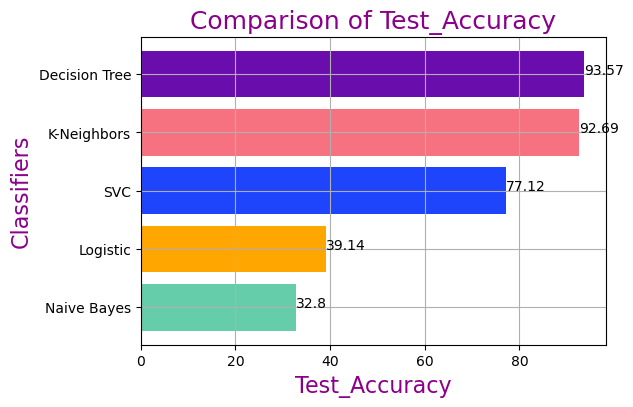

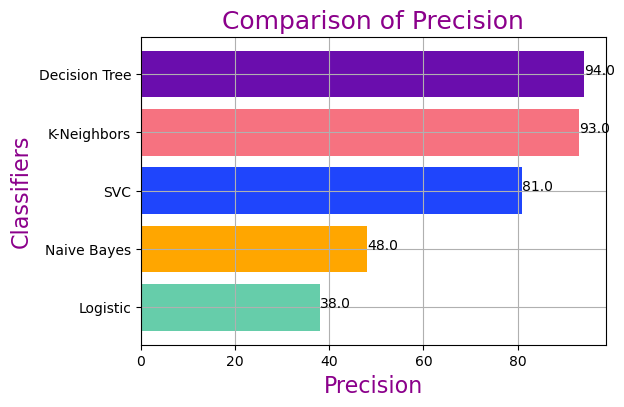

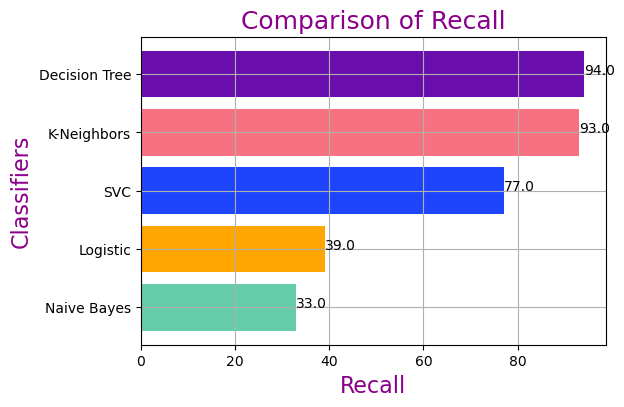

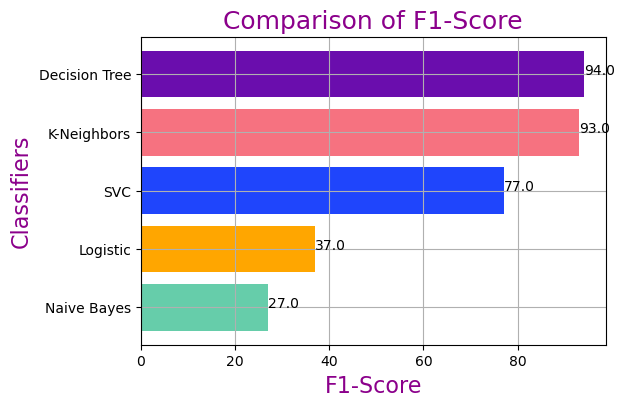

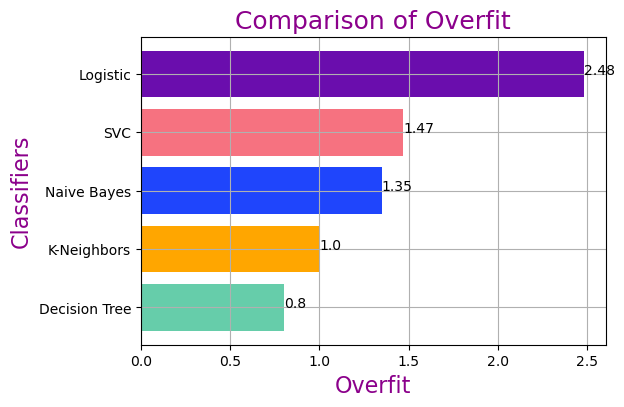

,Classifiers,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,Overfit
1,Decision Tree,94.37,93.57,94.0,94.0,94.0,0.80
3,K-Neighbors,93.69,92.69,93.0,93.0,93.0,1.00
0,Naive Bayes,34.15,32.80,48.0,33.0,27.0,1.35
2,SVC,78.59,77.12,81.0,77.0,77.0,1.47
4,Logistic,41.62,39.14,38.0,39.0,37.0,2.48


In [ ]:
TestTResList=[[],[],[],[],[],[]]
MdlStored=[]
print("_____________________________________________________________________________")
for i in range(len(UCH_Mdls)):
    print("                            {} ".format(ID_Mdls[i]))
    print("_____________________________________________________________________________")
    TestResLoop=[[],[],[],[],[],[]]
    for ts in range(10):
        UCH_Mdls[i].fit(XTrain_UCH,yTrain_UCH)
        TestPrediction=UCH_Mdls[i].predict(XTest_UCH)
        TrainPrediction=UCH_Mdls[i].predict(XTrain_UCH)
        TestResLoop[0].append(round(metrics.accuracy_score(yTest_UCH,TestPrediction)*100,2))

        Pred_Metrics=metrics.precision_recall_fscore_support(yTest_UCH,TestPrediction, average='weighted')[:-1]
        TestResLoop[1].append(round(Pred_Metrics[0],2)*100)
        TestResLoop[2].append(round(Pred_Metrics[1],2)*100)
        TestResLoop[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pd.crosstab(yTest_UCH, TestPrediction, rownames=['Actual'], colnames=['Detected'], margins=True)
        TestResLoop[4].append(cmt.iloc[:5,:5])
        TestResLoop[5].append(metrics.classification_report(yTest_UCH, TestPrediction))
    MdlStored.append(TestResLoop[0])
    tstix=TestResLoop[0].index(max(TestResLoop[0]))
    TestTResList[0].append(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2))
    TestTResList[1].append(TestResLoop[0][tstix])
    TestTResList[2].append(TestResLoop[1][tstix])
    TestTResList[3].append(TestResLoop[2][tstix])
    TestTResList[4].append(TestResLoop[3][tstix])
    MdlOv=round(abs(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2)-TestResLoop[0][tstix]),2)
    TestTResList[5].append(MdlOv)
    py_grp.figure(figsize=(8,5))
    py_grp.title("{} Confusion Matrix".format(ID_Mdls[i]), fontsize=20,color="#8B008B")
    py_sb.heatmap(TestResLoop[4][tstix],fmt="d",annot=True,cmap="plasma")
    py_grp.show()
    print("\nTest Accuracy: {}%\n".format(TestResLoop[0][tstix]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(yTrain_UCH,TrainPrediction)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(ID_Mdls[i],TestResLoop[5][tstix]))
    print("_____________________________________________________________________________")

TestDF=pd.DataFrame({
    "Classifiers":ID_Mdls,
    "Train_Accuracy":TestTResList[0],
    "Test_Accuracy":TestTResList[1],
    "Precision":TestTResList[2],
    "Recall":TestTResList[3],
    "F1-Score":TestTResList[4],
    "Overfit":TestTResList[5]
})
DisCrtCol=["#66CDAA","#FFA600","#1F45FC","#F67280","#6A0DAD"]
for rh in TestDF.columns.tolist()[1:]:
    TestDF=TestDF.sort_values(by=rh,ascending=True)
    py_grp.figure(figsize=(6,4))
    py_grp.title("Comparison of {}".format(rh),fontsize=18,color="#8B008B")
    py_grp.barh(TestDF['Classifiers'],TestDF[rh],color=DisCrtCol)
    py_grp.ylabel("Classifiers",fontsize=16,color="#8B008B")
    py_grp.xlabel("{}".format(rh),fontsize=16,color="#8B008B")
    for sl, vl in enumerate(TestDF["{}".format(rh)]):
        py_grp.text(vl, sl, str(vl))
    py_grp.grid()
    py_grp.show()
TestDF.sort_values(by=["Overfit","Test_Accuracy"],kind='quicksort',
                         ascending = [True, True],ignore_index=True)
TestDF.to_csv("Heart_Test_Result.csv")
TestDF

In [ ]:
t2 = datetime.datetime.now()
delta = t2 - t1
print("\nCode Execution Time: ",delta.total_seconds(),"Seconds")


Code Execution Time:  74.953331 Seconds
